<a href="https://colab.research.google.com/github/aminayusif/Weather-Crop-Advisor/blob/main/Weather_Crop_Advisor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Agricultural productivity is highly influenced by environmental conditions such as temperature, rainfall, soil properties, and humidity. Farmers, especially in developing regions, often face challenges in selecting the most suitable crops for planting due to unpredictable weather patterns and limited access to expert guidance. This can lead to poor yields, wasted resources, and economic losses.

The **Weather-Based Crop Advisor** project aims to support farmers in making informed decisions by using machine learning to recommend the best crops to plant based on prevailing agro-meteorological and soil conditions. By analyzing features like temperature, rainfall, humidity, and soil pH, the system learns patterns from historical data to predict the most suitable crops for a given set of conditions.

This project simulates or integrates environmental datasets to train and evaluate classification models (e.g., decision trees, random forests, or logistic regression) for crop recommendation. The ultimate goal is to provide data-driven insights that empower farmers to optimize yield, reduce risk, and adapt more effectively to climate variability.

By leveraging machine learning in agriculture, this project demonstrates how data science can contribute to sustainable farming, food security, and rural development.

## Objectives

### 1. Crop Recommendation using Classification

Predict the most suitable crop (crop_type) to grow based on weather and soil conditions using classification algorithms like Random Forest, Decision Tree, Support Vector Machine (SVM), K-Nearest Neighbors (KNN)

### 2. Yield Prediction using Regression

Predict crop yield (in kg/hectare or tons) based on environmental factors by using algorithms like Random Forest Regressor, Linear Regression, Gradient Boosting (e.g., XGBoost), Support Vector Regression (SVR).

### 3. Time Series Forecasting

Forecast future rainfall/temperature to assist crop decision using ARIMA or Prophet (by Facebook) for weather trends.

## Dataset Overview

 The dataset for this case study is provided in the file

**simulated_crop_weather_data.csv** and contains approximately 2,000 records. The key attributes include:

 | Column          | Description                            |
| --------------- | -------------------------------------- |
| `id`            | Unique identifier                      |
| `date`          | Observation date                       |
| `region`        | Geographic area within Ghana where the crop is grown
| `temperature`   | Temperature in °C                      |
| `rainfall`      | Rainfall in mm                         |
| `humidity`      | Humidity percentage                    |
| `soil_moisture` | Soil moisture percentage               |
| `soil_type`     | Soil type (e.g., Sandy, Clay, Loamy)          |
| `crop_type`     | Crop grown **(target variable)**           |
| `crop_variety`     | Specific variety of the crop (e.g., Obatanpa maize)**           |
| `yield_kg`      | Yield in kilograms **(regression target)** |
| `soil_pH`      |  Represents the acidity or alkalinity of the soil (can be a key feature in predicting crop suitability)                        |
| `fertilizer_used` | Type of fertilizer applied (e.g., NPK, Urea, Organic, None)                   |
| `fertilizer_quantity_kg` | Quantity of fertilizer applied per hectare               |
| `pesticide_used`     | Whether pesticide was applied (Yes/No)          |
| `planting_method`     |  Direct seeding, transplanting, broadcasting, etc.         |
| `elevation_m`      | Elevation of the farm above sea level (m) |
| `season`     |  This column represents the agricultural season in which the crop was planted or harvested        |
| `irrigation`      | Whether irrigation was used (Yes/No) |
| `planting_density`     | Plants per square meter or hectare          |
| `harvest_method`      |  This indicates the technique used to harvest the crop (Manual or Mechanized) |
| `market_access_km`     |   Represents the distance (in kilometers) from the farm to the nearest market         |
| `extension_services`      |  Indicates whether the farmer had access to agricultural extension services |
      |


## Data Exploration and Preprocessing

### Import common libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Load and inspect dataset

In [2]:
data=pd.read_csv('simulated_crop_weather_data.csv')
display(data.head())

,id,date,region,temperature,rainfall,humidity,soil_moisture,soil_type,crop_type,crop_variety,...,pesticide_used,planting_method,irrigation,elevation_m,slope_percent,season,planting_density,harvest_method,market_access_km,extension_services
0,1,2023-07-11,Brong Ahafo,29.5,94.5,82.0,43.9,Sandy,Onion,Bawku Red,...,Yes,Transplanting,Yes,187.2,7.3,Minor,28029,Mechanized,23.3,Yes
1,2,2022-06-30,Eastern,31.0,76.8,65.5,32.2,Clay,Groundnut,Manipinta,...,Yes,Transplanting,No,343.2,3.4,Major,21447,Mechanized,28.3,No
2,3,2022-06-13,Northern,22.8,77.5,78.4,25.6,Sandy,Tomato,Power Rano,...,Yes,Broadcasting,No,383.1,11.4,Major,37184,Manual,2.2,No
3,4,2021-10-30,Upper West,21.6,74.8,75.4,43.7,Sandy,Cowpea,Songotra,...,Yes,Direct Seeding,Yes,404.9,3.9,Minor,23119,Manual,19.2,No
4,5,2022-03-20,Central,24.5,115.0,62.0,58.0,Sandy,Maize,Obatanpa,...,No,Broadcasting,Yes,497.6,5.1,Major,60225,Mechanized,17.4,Yes


In [3]:
data.tail()

,id,date,region,temperature,rainfall,humidity,soil_moisture,soil_type,crop_type,crop_variety,...,pesticide_used,planting_method,irrigation,elevation_m,slope_percent,season,planting_density,harvest_method,market_access_km,extension_services
1995,1996,2024-06-22,Northern,27.1,93.8,60.8,23.6,Peaty,Sorghum,Kapaala,...,No,Direct Seeding,No,106.9,4.2,Major,56203,Mechanized,22.0,No
1996,1997,2022-05-10,Western,28.2,117.7,71.2,55.5,Silty,Yam,Dente,...,No,Transplanting,No,397.1,1.3,Major,25148,Mechanized,16.2,Yes
1997,1998,2024-03-21,Upper West,27.5,107.9,75.4,51.6,Clay,Cassava,Bankye Hemaa,...,No,Direct Seeding,Yes,411.3,10.4,Major,44898,Manual,18.2,Yes
1998,1999,2022-08-20,Upper West,28.9,101.8,68.7,51.8,Clay,Cocoa,Hybrid,...,Yes,Direct Seeding,Yes,215.9,9.1,Minor,63949,Manual,8.6,No
1999,2000,2022-11-13,Eastern,24.8,61.0,63.9,57.8,Loamy,Soybean,Jenguma,...,No,Transplanting,Yes,346.4,15.0,Dry,54318,Mechanized,6.9,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2000 non-null   int64  
 1   date                    2000 non-null   object 
 2   region                  2000 non-null   object 
 3   temperature             2000 non-null   float64
 4   rainfall                2000 non-null   float64
 5   humidity                2000 non-null   float64
 6   soil_moisture           2000 non-null   float64
 7   soil_type               2000 non-null   object 
 8   crop_type               2000 non-null   object 
 9   crop_variety            2000 non-null   object 
 10  yield_kg                2000 non-null   float64
 11  soil_pH                 2000 non-null   float64
 12  fertilizer_used         2000 non-null   object 
 13  fertilizer_quantity_kg  2000 non-null   float64
 14  pesticide_used          2000 non-null   

Dataset has 2000 rows and 24 columns

In [5]:
data.shape

(2000, 24)

Let's check if there are any missing values in any column

In [6]:
data.isnull().sum()

,0
id,0
date,0
region,0
temperature,0
rainfall,0
humidity,0
soil_moisture,0
soil_type,0
crop_type,0
crop_variety,0


There are no null values in any column of the dataset

### Distribution of key features

**Weather-related**: temperature, rainfall, humidity

**Soil-related**: soil_moisture, soil_type, soil_pH

**Crop-specific**: crop_type, yield_kg, crop_variety, season, planting_method, harvest_method

**Farming inputs**: fertilizer_used, fertilizer_quantity_kg, pesticide_used, irrigation, extension_services

**Geography**: region, elevation_m, slope_percent, market_access_km

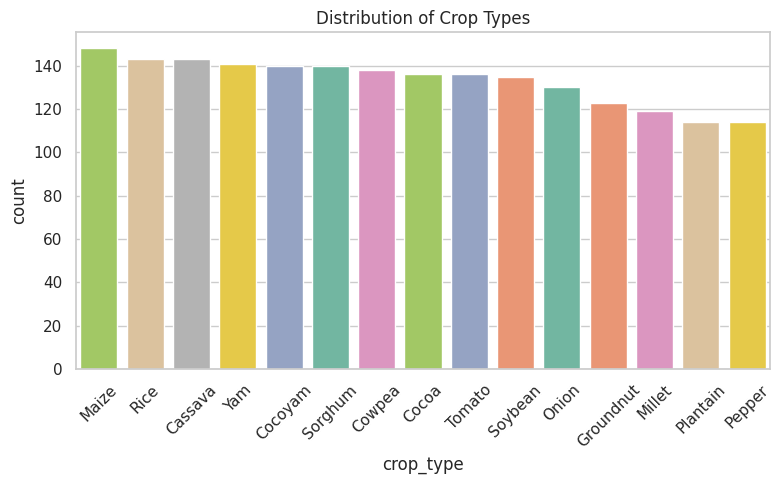

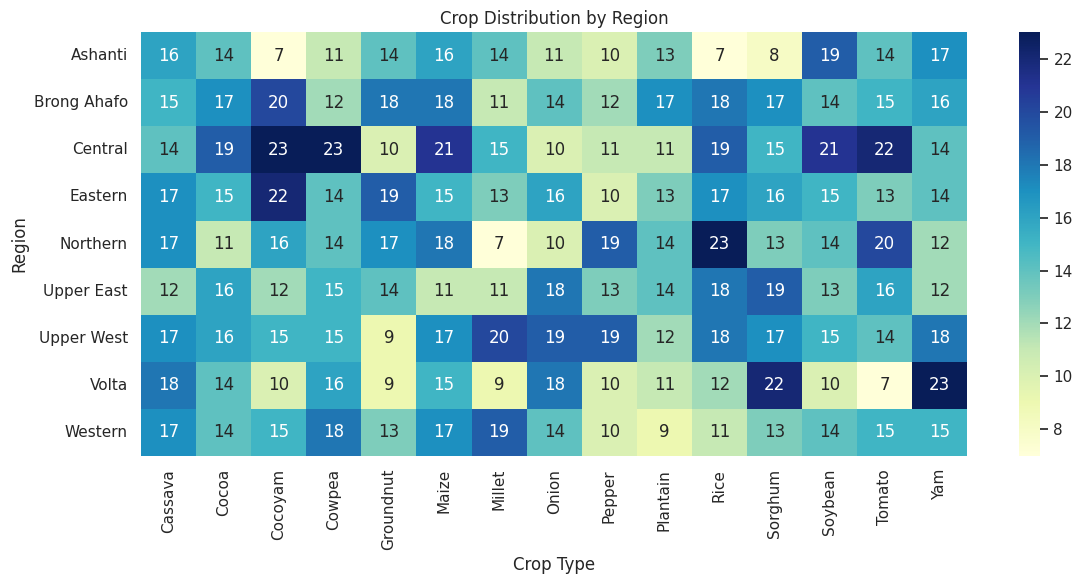

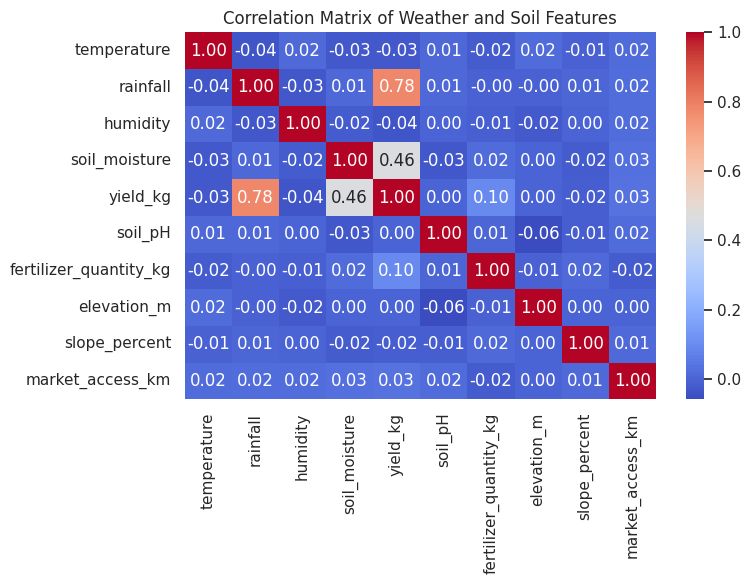

(crop_type
 Maize        148
 Rice         143
 Cassava      143
 Yam          141
 Cocoyam      140
 Sorghum      140
 Cowpea       138
 Cocoa        136
 Tomato       136
 Soybean      135
 Onion        130
 Groundnut    123
 Millet       119
 Plantain     114
 Pepper       114
 Name: count, dtype: int64,
                         temperature  rainfall  humidity  soil_moisture  \
 temperature                    1.00     -0.04      0.02          -0.03   
 rainfall                      -0.04      1.00     -0.03           0.01   
 humidity                       0.02     -0.03      1.00          -0.02   
 soil_moisture                 -0.03      0.01     -0.02           1.00   
 yield_kg                      -0.03      0.78     -0.04           0.46   
 soil_pH                        0.01      0.01      0.00          -0.03   
 fertilizer_quantity_kg        -0.02     -0.00     -0.01           0.02   
 elevation_m                    0.02     -0.00     -0.02           0.00   
 slope_percent  

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual theme
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Crop type distribution
crop_counts = data['crop_type'].value_counts()

# Region-wise crop distribution
region_crop_counts = data.groupby(['region', 'crop_type']).size().unstack().fillna(0)

# Correlation matrix (only numeric features)
correlation_matrix = data.select_dtypes(include='float64').corr()

# Plot crop distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='crop_type', order=crop_counts.index, palette='Set2', hue='crop_type')
plt.title("Distribution of Crop Types")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot region vs crop type heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(region_crop_counts, cmap='YlGnBu', annot=True, fmt='g')
plt.title("Crop Distribution by Region")
plt.xlabel("Crop Type")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Weather and Soil Features")
plt.tight_layout()
plt.show()

# Display insights
crop_counts, correlation_matrix.round(2)

### Feature Insights

1. **Crop type distribution**

The most frequent crops are:

1. Maize (148 samples)

2. Cassava (143)

3. Rice (143)

The least frequent are:

4. Plantain and Pepper (114 each)

This balanced distribution is good for classification tasks.

2. **Regional Crop Distribution**

1. Some crops are more region-specific, indicating potential for region-aware predictions.

For example:

Cocoa is prevalent in forested regions like Western and Ashanti.

Sorghum and Millet appear more in the savanna regions (Upper East, Northern).

This supports the inclusion of **region** as a significant feature.



3.  **Correlation Matrix** (Numerical Features)

**yield_kg** strongly correlates with:

1. rainfall (0.81): Higher rainfall → higher yield

2. soil_moisture (0.44): Moist soil supports better yields

Other features (temperature, humidity) show low linear correlation but may still have nonlinear impacts in model training.

**Key Feature Highlights**

**Top Crop**: Maize, followed by Cassava, Rice, etc.

**Top Soil Type**: Silty

**Top Region**: Central

**Top Fertilizer**: Organic (523 uses)

**Top Planting Method**: Direct Seeding

**Most Common Season**: Major

**Top Extension Service Access**: Yes (~50%)

### Converting categorical features using one hot encoding

Let's get all our categorical variables

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      2000 non-null   int64  
 1   date                    2000 non-null   object 
 2   region                  2000 non-null   object 
 3   temperature             2000 non-null   float64
 4   rainfall                2000 non-null   float64
 5   humidity                2000 non-null   float64
 6   soil_moisture           2000 non-null   float64
 7   soil_type               2000 non-null   object 
 8   crop_type               2000 non-null   object 
 9   crop_variety            2000 non-null   object 
 10  yield_kg                2000 non-null   float64
 11  soil_pH                 2000 non-null   float64
 12  fertilizer_used         2000 non-null   object 
 13  fertilizer_quantity_kg  2000 non-null   float64
 14  pesticide_used          2000 non-null   

In [9]:
categorical_variables = data.select_dtypes(include='object').columns.tolist()
categorical_variables

['date',
 'region',
 'soil_type',
 'crop_type',
 'crop_variety',
 'fertilizer_used',
 'pesticide_used',
 'planting_method',
 'irrigation',
 'season',
 'harvest_method',
 'extension_services']

Let's now one-hot encode these variables

No one hot-encoding **crop_type** as it is a target variable

In [10]:
categorical_cols = ['region','soil_type','crop_variety','fertilizer_used', 'pesticide_used', 'planting_method', 'irrigation',
    'season','harvest_method', 'extension_services']
if any(col in data.columns for col in categorical_cols):
  data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

data.head()

,id,date,temperature,rainfall,humidity,soil_moisture,crop_type,yield_kg,soil_pH,fertilizer_quantity_kg,...,fertilizer_used_Organic,fertilizer_used_Urea,pesticide_used_Yes,planting_method_Direct Seeding,planting_method_Transplanting,irrigation_Yes,season_Major,season_Minor,harvest_method_Mechanized,extension_services_Yes
0,1,2023-07-11,29.5,94.5,82.0,43.9,Onion,1759.4,5.12,131.1,...,False,False,True,False,True,True,False,True,True,True
1,2,2022-06-30,31.0,76.8,65.5,32.2,Groundnut,1433.5,6.60,136.0,...,True,False,True,False,True,False,True,False,True,False
2,3,2022-06-13,22.8,77.5,78.4,25.6,Tomato,1353.2,5.67,187.1,...,True,False,True,False,False,False,True,False,False,False
3,4,2021-10-30,21.6,74.8,75.4,43.7,Cowpea,1690.8,4.69,125.9,...,False,True,True,True,False,True,False,True,False,False
4,5,2022-03-20,24.5,115.0,62.0,58.0,Maize,1885.0,8.36,131.6,...,True,False,False,False,False,True,True,False,True,True


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 67 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2000 non-null   int64  
 1   date                            2000 non-null   object 
 2   temperature                     2000 non-null   float64
 3   rainfall                        2000 non-null   float64
 4   humidity                        2000 non-null   float64
 5   soil_moisture                   2000 non-null   float64
 6   crop_type                       2000 non-null   object 
 7   yield_kg                        2000 non-null   float64
 8   soil_pH                         2000 non-null   float64
 9   fertilizer_quantity_kg          2000 non-null   float64
 10  elevation_m                     2000 non-null   float64
 11  slope_percent                   2000 non-null   float64
 12  planting_density                20

Next, we could proceed to feature scaling of numerical features which include temperature, rainfall, humidity, soil_ph, soil_moisture, wind_speed. However, since our numerical variables contain no anomalous data, we will apply these techniques:
1. Use raw (unscaled) data for Random Forest and Decision Tree
2. Use scaled data on numerical columns for Support Vector Machine (SVM) and K-Nearest Neighbors (KNN)